# Autoencoder with MNIST Handwritten Image Dataset

Link to the Youtube video tutorial:https://www.youtube.com/watch?v=JoR5HCs0n0s

**Motivation to have an autoencoder:**
1) We have this autoencoder so we've trained this encoder to take an image of 784 values/features (original feature dimension) and condense it down to 64 values/feature (new reduced feature dimension), yet still contain the same meaning (means both feature dimension can represent the same input image). Then, before we pass the features of a dataset through a different neural network for other tasks (EG: classification problem), if our training data are these MNIST images, we could actually feed the encoded 64 features (new reduced feature dimension) through the different neural network, rather than feeding the 784 features (original feature dimension) through the different neural network. Thus, making the different neural network easier to learn the features of the dataset. Also, we can change the data types and more.

**Insights of this tutorial:**
1) We trained an autoencoder to just take images and encode (compress the features[data] OR reduce the feature dimension) them into the meaning of that image. 
2) Since an autoencoder is an unsupervised machine learning model, it has just kind of figured out like this group of images goes together and here's the generic version of that group.

In [24]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load dataset

In [25]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# Data Visualization

The train set consists of 60000 samples(images), each image has dimension of 28x28 (pixels), with 1 color channel (grayscale). This means each image has 28 x 28 = 784 features.
The train set consists of 10000 samples(images), each image has dimension of 28x28 (pixels), with 1 color channel (grayscale). This means each image has 28 x 28 = 784 features.

The features of the 1st sample in train set:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 

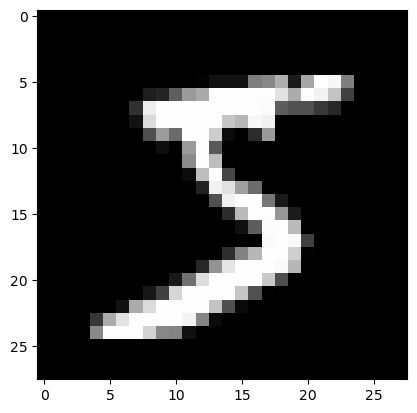

In [26]:
print(f"The train set consists of {X_train.shape[0]} samples(images), each image has dimension of {X_train.shape[1]}x{X_train.shape[2]} (pixels), with 1 color channel (grayscale). This means each image has {X_train.shape[1]} x {X_train.shape[2]} = {str(X_train.shape[1]*X_train.shape[1])} features.")
print(f"The train set consists of {X_test.shape[0]} samples(images), each image has dimension of {X_test.shape[1]}x{X_test.shape[2]} (pixels), with 1 color channel (grayscale). This means each image has {X_test.shape[1]} x {X_test.shape[2]} = {str(X_test.shape[1]*X_test.shape[1])} features.")
color_channel = 1 # The samples(images) of the dataset are in grayscale (consists of only 1 color channel)

# Show the image of 1st sample in the train set
plt.imshow(X_train[0], cmap="gray")

# Show the features of 1st sample in the train set
print('\nThe features of the 1st sample in train set:\n', X_train[0])

# Data Preprocessing

## Scale data

1) Scale the features (pixel values) of each image into the range between 0 and 1, by dividing with 255 (because each pixel value has minimum value of 0 and maximum value of 255).
2) Data scaling makes a neural network performs better (related to the concept of gradient descent & backpropagation)
3) For neural network, we generally like to keep data between -1 and 1 OR 0 and 1. In this case, it is between 0 and 1.


The features of the 1st sample in the scaled train set:
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.      

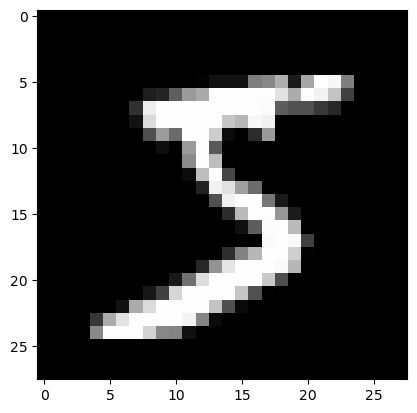

In [27]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Show the image of 1st sample in the scaled train set
plt.imshow(X_train_scaled[0], cmap="gray")

# Show the features of 1st sample in the scaled train set
print('\nThe features of the 1st sample in the scaled train set:\n', X_train_scaled[0])

# Build an autoencoder

1) The autoencoder involved in this tutorial consists of an encoder and a decoder.
2) The autoencoder is used to perform condensation (dimensionality reduction) of the features of dataset.
3) There's like a million ways that you could you can make an autoencoder. Literally the only thing that matters is that you map input to input.
4) The encoder of an autoencoder is made up by a neural network.
5) The decoder of an autoencoder is made up by a neural network.

**Motivation to have an autoencoder:**
1) We have this autoencoder so we've trained this encoder to take an image of 784 values/features (original feature dimension) and condense it down to 64 values/feature (new reduced feature dimension), yet still contain the same meaning (means both feature dimension can represent the same input image). Then, before we pass the features of a dataset through a different neural network for other tasks (EG: classification problem), if our training data are these MNIST images, we could actually feed the encoded 64 features (new reduced feature dimension) through the different neural network, rather than feeding the 784 features (original feature dimension) through the different neural network. Thus, making the different neural network easier to learn the features of the dataset. Also, we can change the data types and more.

## Encoder

1) Develop the encoder of the autoencoder using functional model
2) The encoder receives an input image, then condense (reduce the dimensionality) the features (represented by a longer vector) of the input image into new set of features with lower dimensions(size) (represented by a shorter vector) by using neural network. The dimensionality reduction concept here is similar to the one of principal component analysis (PCA), just the method of performing the dimensionality reduction is different.
3) You can build the encoder with multiple dense(hidden) layers. A dense layer consists of neurons that provide a vector of N dimensions/elements, where N refers to the number of neurons in that dense layer.

In [28]:
# Define the input layer of the encoder of the autoencoder. Syntax-> encoder_input = keras.Input(shape = (dimension of the image,dimension of the image, color channel number of the image[3 for rgb, 1 for grayscale]), name="name of the layer")
encoder_input = keras.Input(shape = (X_train.shape[1],X_train.shape[2], color_channel), name="img")
# Define the flatten layer to flatten the features from 2D into 1D, so that each flattened features can be fed to the neural network for processing (same concept as using ANN to perform image classification). We provide encoder_input to this flatten layer as input.
x = keras.layers.Flatten()(encoder_input)
# Define the output layer of the encoder of the autoencoder. The output layer consists of 64 output neurons to provide a vector of 64 dimensions (64 elements in that output vector). This means, the encoder condense the original 28x28=784 features into new 64 features, which can be used to represent all samples in the dataset. The encoder output layer is also called bottleneck, the middle layer of the autoencoder.
encoder_output = keras.layers.Dense(64, activation="relu")(x)

# Build an encoder model using the layers from encoder_input to encoder_output (optional to have this line, based on your application)
encoder = keras.Model(encoder_input, encoder_output, name="encoder")

## Decoder

1) Develop the decoder of the autoencoder using functional model
2) The decoder receives the new reduced features provided at the bottleneck as the input, then uses it to generate (transform back to) the flattened features of the corresponding input image by using neural network, followed by reshaping the flattened features generated by the decoder into the dimensions  same as the original input image. (so that the features generated by the decoder can be visualized at the dimensions same as the original input image).
3) You can build the decoder with multiple dense(hidden) layers.

In [29]:
# Define the input layer of the decoder of the autoencoder. We provide encoder_output (contains the new reduced features [here, the new reduce features is a vector of 64 dimensions/elements] provided by the bottleneck) to this decoder_input layer as input. Syntax-> encoder_input = keras.layers.Dense(shape = (the size of flattened features you want the decoder to provide, also equals to the number of neurons in the layer where each neuron provide an element/feature), activation="the type of activation function") 
decoder_input = keras.layers.Dense(X_train.shape[1]*X_train.shape[2], activation="relu")(encoder_output) # Same as-> decoder_input = keras.layers.Dense(784, activation="relu")(encoder_output)

# Define the output layer of the decoder of the autoencoder. We provide decoder_input (contains the flattened features generated by the decoder using the new reduced features provided at the bottleneck) to this decoder_output layer as input. This decoder_output layer is used to reshape the flattened features generated by the decoder (using the new reduced features provided at the bottleneck) from 1D into multiple-D with taking into account the color channel numbers, so that the features generated by the decoder can be used to visualize the corresponding image at the desired dimensions (here, at the dimensions same as the original input(image)).
decoder_output = keras.layers.Reshape((X_train.shape[1],X_train.shape[2],color_channel))(decoder_input) # Same as-> decoder_output = keras.layers.Reshape((28,28,1))(decoder_input)

## Autoencoder (Encoder + Decoder)

The autoencoder consists of encoder and decoder

In [30]:
# Define the optimizer (hyperparameter) to build the autoencoder
opt = keras.optimizers.Adam(
    learning_rate=0.001, # Set the learning rate
    decay=1e-6) # Set the decay rate

# Build an autoencoder model using the layers from encoder_input to decoder_output
autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")

# Compile the autoencoder model, using the defined optimizer and mean squared error (MSE) as the cost function of each epoch
autoencoder.compile(
    opt, 
    loss="mse")

# Show the summary(details) of the autoencoder model
autoencoder.summary()

c:\Users\weiyo\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │        50,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

# Train the autoencoder

1) In convention, when we train an ANN to perform image classification tasks, we use syntax-> model.fit(X_train, Y_train). This is because for each sample in X_train, the ANN is trained with the features of the sample to make prediction on the label on the sample. The predicted label of the sample (provided by the ANN) is compared with the ground truth label of the sample in Y_train, to calculate the loss for the sample.
2) However, for autoencoder, when we train an autoencoder to perform dimensionality reduction tasks, we use syntax-> model.fit(X_train, X_train). This is because for each sample in X_train, the autoencoder is trained with the original features (large feature dimension) of the sample to reduce the original features into new reduced features (smaller feature dimension). To calculate the loss for the sample, the decoder of the autoencoder generates (decompress/transform back to) the features of the sample (in the same feature dimension as its original (ground truth) one) using the new reduced features provided by the bottleneck of the autoencoder. Then, the features of the sample generated by the decoder is compared with the original features (ground truth) of the sample to calculate the loss for the sample. 
3) When an autoencoder is trained, it means its encoder is trained, and also means its decoder is trained.

In [31]:
# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0287 - val_loss: 0.0124
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0122 - val_loss: 0.0117
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0116 - val_loss: 0.0115


# Apply the autoencoder

## Apply the trained encoder to perform dimensionality reduction

In [32]:
# Use the trained encoder to predict (perform dimensionality reduction. Here, the encoder is trained to reduce feature dimension from 784 features into 64 features) a sample in test set. The encoder output (new reduced features) can be obtained at the bottleneck (the middle layer of the autoencoder). ".reshape(-1, 28, 28, 1)])[0]" is used to perform some reshaping because here we only make prediction on 1 sample, but the model.predict() functions accepts inputs and provide outputs as a list.
bottleneck = encoder.predict([X_test_scaled[0].reshape(-1, X_test_scaled.shape[1], X_test_scaled.shape[2], color_channel)])[0] # bottleneck is a hidden (dense) layer with neurons, at the middle of an autoencoder, that provides the encoder output (new reduced features)

print("------------Before applying the trained encoder:------------")
# Show the original (ground truth) scaled features of the 1st sample in test set
print(f"The original (ground truth) scaled features of the 1st sample in test set:\n", X_test_scaled[0])

# Show the number of dimension of the original (ground truth) scaled features of the 1st sample in test set
print(f"\nThe number of dimension of the original (ground truth) scaled features of the 1st sample in test set: {str(X_test_scaled.shape[1]*X_test_scaled.shape[2])}")

print("\n------------After applying the trained encoder:------------")
# Show the prediction (new reduced features) of the 1st sample in test set
print(f"The prediction (new reduced features) made by the trained encoder on the 1st sample in the test set:\n", bottleneck)

# Show the number of dimension of the original (ground truth) scaled features of the 1st sample in test set
print(f"\nThe number of dimension of the new reduced features of the 1st sample in test set, provided by the trained encoder: {bottleneck.shape[0]}")


print("\n------------Insights:------------")
# Show that the trained encoder performs dimensionality reduction on the features of the 1st sample in test set
print(f"The trained encoder reduce the feature dimension of the 1st sample in test set from {str(X_test_scaled.shape[1]*X_test_scaled.shape[2])} into {bottleneck.shape[0]}.")
print(f"The trained encoder compress/reduce the feature dimension of the sample by {str( (X_test_scaled.shape[1]*X_test_scaled.shape[2]*color_channel - bottleneck.shape[0])/(X_test_scaled.shape[1]*X_test_scaled.shape[2]*color_channel) * 100)} %.")
print(f"In other words, the trained encoder compress/reduce the feature dimension of the sample to {str( bottleneck.shape[0] / (X_test_scaled.shape[1]*X_test_scaled.shape[2]*color_channel) * 100)} %.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
------------Before applying the trained encoder:------------
The original (ground truth) scaled features of the 1st sample in test set:
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.       

### Visualize the image of the sample using the new reduced features provided by the encoder at the bottleneck as output

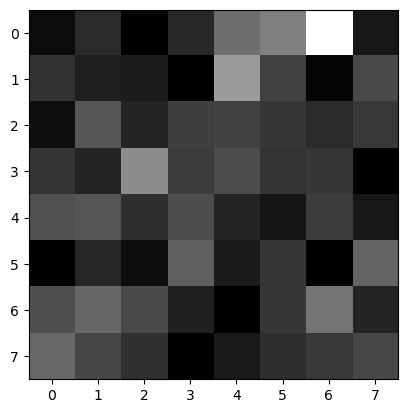

In [33]:
# Show the image of the sample using its reduced new features. The reduced new features provided by the trained encoder is in flatten from (1D) of 64 features. But we need to provide 2D features to plt.imshow() to visualize the image of the sample. Hence, we reshape the new reduced features (consists 64 features) from  of 1D form of length 64 into 2D form of 8x8, using "reshape((int(example.shape[0]**(1/2)), int(example.shape[0]**(1/2)))".
plt.imshow(bottleneck.reshape((int(bottleneck.shape[0]**(1/2)), int(bottleneck.shape[0]**(1/2)))), cmap="gray")

# Extra information:
# print(int(example.shape[0]**(1/2))) = 8
# print(example.shape[0]**(1/2)) = 8.0

## Apply the trained autoencoder to reduce the feature dimension of an input image, followed by reconstructing/generating/decompressing the features of the corresponding image back from its new reduced features provided by the encoder at the bottleneck as output 

Prediction made by an autoencoder here refers to use the encoder to reduce the feature dimension of the input image, then use the decoder to generate the features of the corresponding image (by using the new reduced features provided by the encoder at the bottleneck as output) at the dimensions same as the input image.

In [34]:
# Use the trained autoencoder (encoder + decoder) to predict the 1st sample in test set. Prediction made by an autoencoder here refers to use the encoder to reduce the feature dimension of the input image, then use the decoder to generate the features of the corresponding image (by using the reduced new features provided at the bottleneck) at the dimensions same as the input image.
autoencoder_prediction = autoencoder.predict([X_test_scaled[0].reshape(-1, X_test_scaled.shape[1], X_test_scaled.shape[2], color_channel)])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


### Visualize the image of the sample predicted by the autoencoder (using the features generated by the decoder from the new reduced features provided by the encoder at the bottleneck as output)

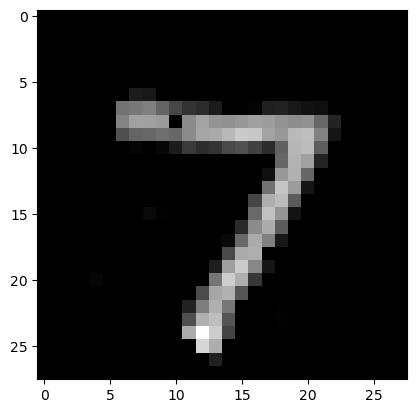

In [35]:
# Show the image of the sample using the features generated by the decoder
plt.imshow(autoencoder_prediction, cmap="gray")

## Visualize the image of the sample using the original (ground truth) scaled features

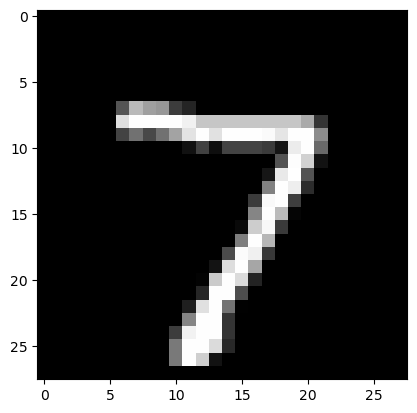

In [36]:
# Show the image of the sample using its original (ground truth) scaled features
plt.imshow(X_test_scaled[0], cmap="gray")